## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results
# Combine the data into a single dataset
combined_df= mouse_metadata.merge(study_results, on='Mouse ID', how='inner')

# Display the data table for preview
combined_df.sample(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
242,g288,Capomulin,Male,3,19,35,38.954115,1
1443,q787,Placebo,Male,17,27,40,62.034127,3
39,m601,Capomulin,Male,22,17,45,28.430964,1
1811,y163,Infubinol,Female,17,27,35,61.730196,2
1357,p310,Propriva,Male,6,26,10,48.665607,1
1644,v835,Naftisol,Male,7,29,15,50.545206,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
1764,x581,Ceftamin,Female,19,28,0,45.000000,0
715,c766,Placebo,Female,13,26,40,67.685295,4
1683,w193,Infubinol,Male,22,30,20,50.005138,0


In [2]:
# Checking the number of mice.
num_cases = len(combined_df)
print(f'Number of Cases = {num_cases}')

num_mice = len(combined_df['Mouse ID'].unique())
print(f'Number of Mice = {num_mice}')

Number of Cases = 1893
Number of Mice = 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse_mask = combined_df.duplicated(subset=['Mouse ID'])

dupe_mice = combined_df[dupe_mouse_mask].sample(100)
dupe_timepoint = dupe_mice.duplicated(subset=['Timepoint'])
mice_duplicates = pd.DataFrame({'Mouse ID': dupe_mice[dupe_timepoint]['Mouse ID']})

print(mice_duplicates)

#clean_df = combined_df.query("Mouse ID in mice_duplicates")


     Mouse ID
485      a275
1015     j984
498      a366
1126     l661
1532     t198
...       ...
1728     w697
1537     t198
1877     z795
1793     x822
882      g497

[91 rows x 1 columns]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
unclean_df = combined_df[combined_df.isin(mice_duplicates)]
#unclean_df.to_excel('optional_unclean.xlsx', engine='xlsxwriter') 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[~combined_df.isin(mice_duplicates)].dropna()
#clean_df.to_excel('output1.xlsx', engine='xlsxwriter') 

In [6]:
# Checking the number of mice in the clean DataFrame.
count_clean_df = len(clean_df['Mouse ID'].unique())
print(f'Number of Mice that have no Timepoint duplication: {count_clean_df}')

Number of Mice that have no Timepoint duplication: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_clean = clean_df.groupby(by=['Drug Regimen'])
clean_df_mean = grouped_clean.mean()
clean_df_median = grouped_clean.median()
clean_df_var = grouped_clean.var()
clean_df_stdev = grouped_clean.std()
clean_df_sem = grouped_clean.sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({'TumorVol Mean':clean_df_mean['Tumor Volume (mm3)'],
                                'TumorVol Median':clean_df_median['Tumor Volume (mm3)'],
                                'TumorVol Variance':clean_df_var['Tumor Volume (mm3)'],
                                 'TumorVol StdDev':clean_df_stdev['Tumor Volume (mm3)'],
                                 'TumorVol StdErr':clean_df_sem['Tumor Volume (mm3)']})


summary_stats_df


,TumorVol Mean,TumorVol Median,TumorVol Variance,TumorVol StdDev,TumorVol StdErr
Drug Regimen,,,,,
Capomulin,40.638782,41.483008,24.968375,4.996837,0.336124
Ceftamin,52.587441,51.683256,39.919508,6.318189,0.488916
Infubinol,52.725971,51.542431,42.658233,6.531327,0.496568
Ketapril,55.147886,53.675542,70.106558,8.372966,0.622358
Naftisol,54.337175,52.484804,66.999941,8.185349,0.618754
Placebo,54.098196,52.478624,62.457540,7.903008,0.606133
Propriva,52.331177,50.909965,42.658223,6.531326,0.522925
Ramicane,40.211351,40.668028,22.825474,4.777601,0.323580
Stelasyn,54.165706,52.178602,61.099259,7.816601,0.604867


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_grouped = clean_df.groupby(by='Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
df_grouped['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.638782,41.483008,24.968375,4.996837,0.336124
Ceftamin,52.587441,51.683256,39.919508,6.318189,0.488916
Infubinol,52.725971,51.542431,42.658233,6.531327,0.496568
Ketapril,55.147886,53.675542,70.106558,8.372966,0.622358
Naftisol,54.337175,52.484804,66.999941,8.185349,0.618754
Placebo,54.098196,52.478624,62.457540,7.903008,0.606133
Propriva,52.331177,50.909965,42.658223,6.531326,0.522925
Ramicane,40.211351,40.668028,22.825474,4.777601,0.323580
Stelasyn,54.165706,52.178602,61.099259,7.816601,0.604867


## Bar and Pie Charts

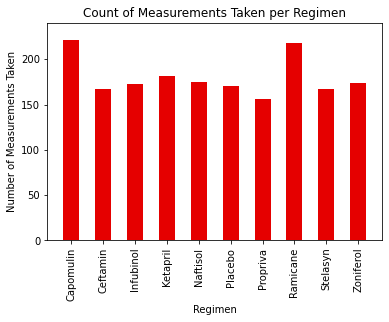

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
cmap = ListedColormap(['#e50000'])
grouped_count_byRegimen = grouped_clean['Mouse ID'].count()

count_gph = grouped_count_byRegimen.plot.bar(x=0,y=1,colormap=cmap)

count_gph.set_xlabel('Regimen')
count_gph.set_ylabel('Number of Measurements Taken')
count_gph.set_title('Count of Measurements Taken per Regimen')

count_gph.set_ylim(0,240)
count_gph.set_xlim(-.75,9.75)

count_gph

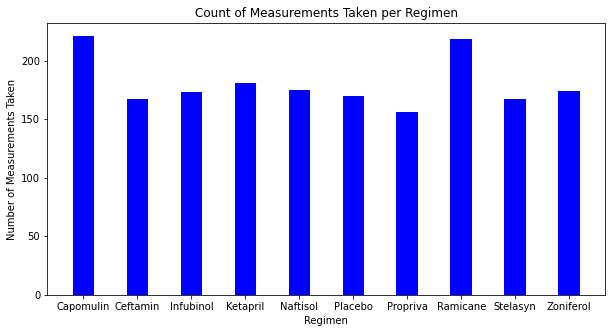

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

fig = plt.figure(figsize = (10, 5))
x_values = grouped_count_byRegimen.index.tolist()
y_values = grouped_count_byRegimen
plt.bar(x_values,y_values, color ='blue', width = 0.4)
  
plt.xlabel("Regimen") 
plt.ylabel("Number of Measurements Taken") 
plt.title("Count of Measurements Taken per Regimen") 
plt.show() 

Text(0.5, 1.0, 'Number of Mice per Gender')

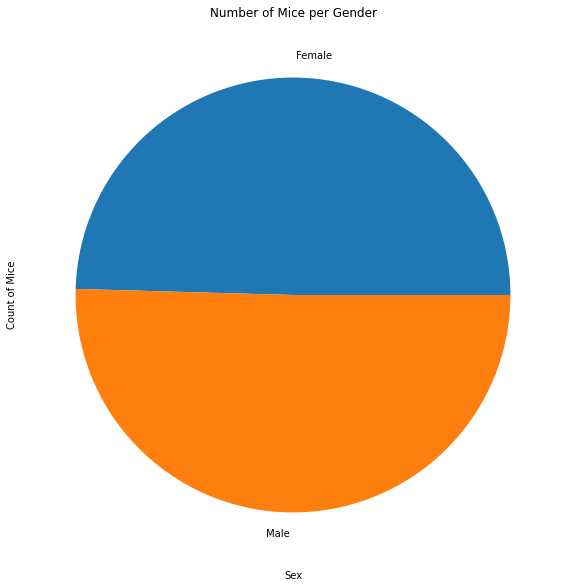

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_sex = clean_df.groupby(by=['Sex']).count()
grouped_sex_df = grouped_sex['Mouse ID']

plot = grouped_sex_df.plot.pie(figsize=(10, 10))
plot.set_xlabel('Sex')
plot.set_ylabel('Count of Mice')
plot.set_title('Number of Mice per Gender')


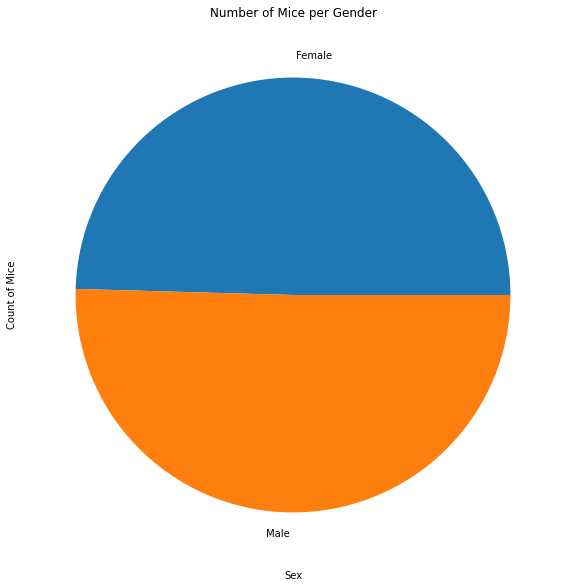

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_values = grouped_sex_df.index.tolist()
y_values = grouped_sex_df

fig = plt.figure(figsize=(10, 10)) 
plt.pie(y_values, labels=x_values)

plt.xlabel("Sex") 
plt.ylabel("Count of Mice") 
plt.title("Number of Mice per Gender") 
plt.show() 

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filtered_df = clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timepoint_df = filtered_df[filtered_df['Timepoint'] == filtered_df.groupby('Mouse ID')['Timepoint'].transform('max')]

max_timepoint_df = max_timepoint_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)','Timepoint','Weight (g)']]
finalvol_df = max_timepoint_df.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Vol'})
finalvol_df

,Mouse ID,Drug Regimen,Final Tumor Vol,Timepoint,Weight (g)
9,k403,Ramicane,22.050126,45,16
19,s185,Capomulin,23.343598,45,17
29,x401,Capomulin,28.484033,45,15
39,m601,Capomulin,28.430964,45,17
49,g791,Ramicane,29.128472,45,16
...,...,...,...,...,...
1797,x822,Ceftamin,61.386660,45,29
1813,y163,Infubinol,67.685569,45,27
1845,y769,Ceftamin,68.594745,45,27
1855,y865,Ceftamin,64.729837,45,26


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
data = finalvol_df['Final Tumor Vol']
IQR = st.iqr(data, interpolation = 'midpoint') 
data_median = data.median()  

upper_bound = data_median + (.5*IQR)
lower_bound = data_median - (.5*IQR)

print(IQR)
print(upper_bound)
print(lower_bound)

# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
outliers=[]

upper_df = finalvol_df.loc[(finalvol_df["Final Tumor Vol"] > upper_bound)]
lower_df = finalvol_df.loc[(finalvol_df["Final Tumor Vol"] < lower_bound)]
outliers.append(upper_df)
outliers.append(lower_df)




22.803703275000004
56.4018516375
33.5981483625


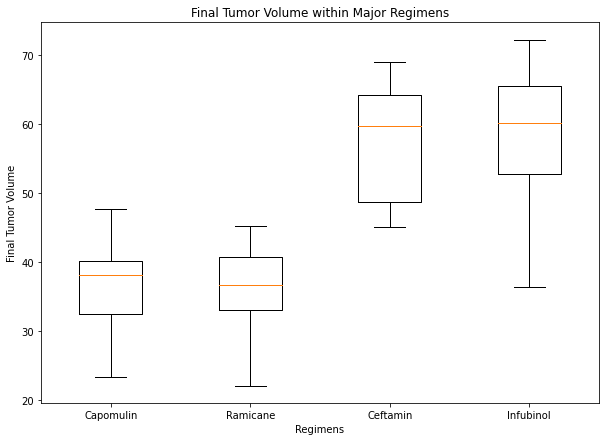

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig = plt.figure(figsize =(10, 7)) 

capomulin_vol = finalvol_df.loc[finalvol_df['Drug Regimen'] == 'Capomulin']['Final Tumor Vol']
ramicane_vol = finalvol_df.loc[finalvol_df['Drug Regimen'] == 'Ramicane']['Final Tumor Vol']
ceftamin_vol = finalvol_df.loc[finalvol_df['Drug Regimen'] == 'Ceftamin']['Final Tumor Vol']
infubinol_vol = finalvol_df.loc[finalvol_df['Drug Regimen'] == 'Infubinol']['Final Tumor Vol']

# Creating plot 
data_to_plot = [capomulin_vol,ramicane_vol,ceftamin_vol,infubinol_vol]
box_plot = plt.boxplot(data_to_plot) 
xticks = ['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol']
plt.xticks([1,2,3,4],xticks)
# show plot 
plt.title('Final Tumor Volume within Major Regimens')
plt.xlabel('Regimens')
plt.ylabel('Final Tumor Volume')

plt.show()

## Line and Scatter Plots

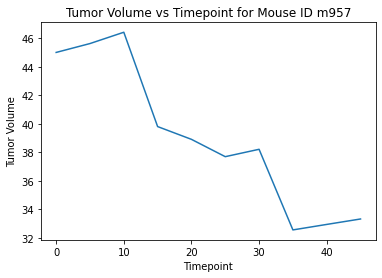

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
y_value = clean_df.loc[clean_df['Mouse ID'] == 'm957']['Tumor Volume (mm3)']

x_value = clean_df.loc[clean_df['Mouse ID'] == 'm957']['Timepoint']

plt.plot(x_value,y_value)
plt.title('Tumor Volume vs Timepoint for Mouse ID m957')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

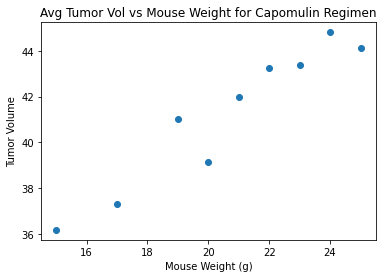

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
filtered_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = filtered_df.groupby(by=['Weight (g)']).mean()

y_vals = avg_tumor_vol['Tumor Volume (mm3)']
x_vals = avg_tumor_vol.index.tolist()
plt.scatter(x_vals,y_vals)

plt.title('Avg Tumor Vol vs Mouse Weight for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume')

plt.show()

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
lr = st.linregress(y_vals,x_vals)

print(f'Correlation Coefficient = {lr[0]}')
print(" ")
print("Regression Statistics")
print("_______________________________________________")

print(f'Intercept = {lr[1]}')
print(f'r Value = {lr[2]}')
print(f'p Value = {lr[3]}')
print(f'Standard Error = {lr[4]}')


Correlation Coefficient = 1.0203038860603828
 
Regression Statistics
_______________________________________________
Intercept = -21.41531964952416
r Value = 0.9562383397765548
p Value = 5.5302077103377265e-05
Standard Error = 0.11799732075602211
